### This Notebook is intended to demonstrate the current scripts and function developed recently (Spring-Summer 2020) Don't hesitate to contact me if you have any question. If you detect any bug, you can fill [an issue report](https://github.com/TChauvire/EPR_ESR_Suite/issues).

### Notebook contents : 
    1) Import EPR Bruker Files (BE3ST or ESP types)
    2) Baseline Correction of 1D data files
    3) Datasmooth EPR data
    4) Import multiple 1D datafiles for data treatment automation (3 steps : Import, Baseline correction, Smoothing)
    5) Pseudo-derivation of zero derivatives ESR data (Q-Band Pulse-Field swept echo)
    6) Import of EPR pulsed data with automatic first order phase correction
    7) Frequency domain transformation of ESEEM data
    8) ...

___
### 1) Import EPR Bruker Files (BE3ST or ESP types)
___

In [1]:
### Check for path environment ###
import sys, os, warnings
currentpath = os.getcwd()
folderdata = currentpath + '\\Tests\\epr_Testfiles\\'
folderscript = currentpath + '\\Scripts\\'
sys.path.append(folderdata)
sys.path.append(folderscript)
warnings.filterwarnings('ignore')

In [2]:
### Import of the modules located in Scripts folder ###
import automatic_phase, basecorr1D, datasmooth, eprload_BrukerBES3T, eprload_BrukerESP, fdaxis, fieldmodulation, hilberttrans, ImportMultipleFiles, rcfilt, statistic_tools, windowing

In [3]:
### Import scientific library tools ###
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 80

In [4]:
### Basic data import : .DSC, 1D case
DSC1 = 'DSC_DTA_files\\strong1.DSC'
full_filename1 = folderdata + DSC1
data, abscissa, par = eprload_BrukerBES3T.eprload_BrukerBES3T(full_filename1)

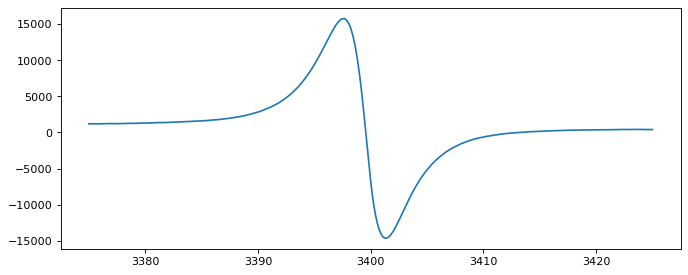

In [5]:
### plot the imported data
plt.plot(abscissa, data);

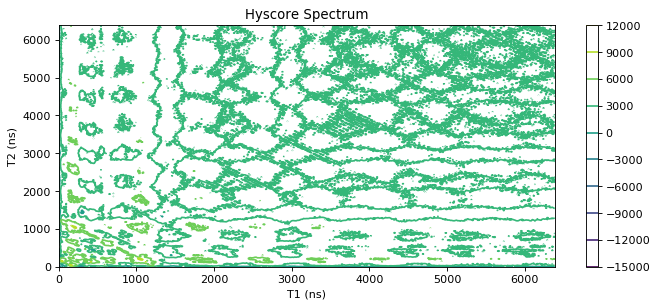

In [6]:
### Basic data import :  .DSC, 2D case (Hiscore data)
DSC2 = 'DSC_DTA_files\\hys_2640G_100ns.DSC'
full_filename2 = folderdata + DSC2
data2, abscissa2, par2 = eprload_BrukerBES3T.eprload_BrukerBES3T(full_filename2)
### plot the imported data
x,y = np.meshgrid(abscissa2[:,0], abscissa2[:,1])
fig, ax = plt.subplots(1, 1);
im = ax.contour(x,y,data2);
ax.set_title('Hyscore Spectrum') ;
ax.set_xlabel("T1 (ns)") ;
ax.set_ylabel("T2 (ns)") ;
cbar = fig.colorbar(im);

In [7]:
par2

{'DSRC': 'EXP',
 'BSEQ': 'BIG',
 'IKKF': 'REAL',
 'XTYP': 'IDX',
 'YTYP': 'IDX',
 'ZTYP': 'NODATA',
 'IRFMT': 'D',
 'XPTS': 400,
 'XMIN': -0.0,
 'XWID': 6384.0,
 'YPTS': 400,
 'YMIN': -0.0,
 'YWID': 6384.0,
 'TITL': ["'hyscore", 'dt=16ns', 'H0=2640G', "tau=100ns'"],
 'IRNAM': "'Intensity'",
 'XNAM': "'Time'",
 'YNAM': "'Time'",
 'IRUNI': "''",
 'XUNI': "'ns'",
 'YUNI': "'ns'",
 'OPER': 'gemi',
 'DATE': '05/11/05',
 'TIME': '20:36:47',
 'CMNT': None,
 'SAMP': None,
 'SFOR': None,
 'STAG': 'C',
 'EXPT': 'PLS',
 'OXS1': 'TADC',
 'AXS1': 'B0VL',
 'AXS2': 'NONE',
 'AXS3': None,
 'MWPW': 0.0006331,
 'A1CT': 0.264,
 'B0VL': 0.264,
 'A1SW': 0.0,
 'MWFQ': 9680501000.0,
 'AVGS': 1,
 '': None,
 '.DVC': <map at 0x28f8f544248>,
 'AcqFineTuning': 'Never',
 'Power': (0.6331, 'mW'),
 'PowerAtten': (25.0, 'dB'),
 'EIEENDORFreq': (14.90218, 'MHz/3.5', 'kG'),
 'EIEIsotope': 'H1',
 'EIERFSweepDir': 'Same',
 'EIEStaticField': (3480.0, 'G'),
 'EIEStaticRF': (1.0, 'MHz'),
 'RF1Atten': (60.0, 'dB'),
 'RF1Freq

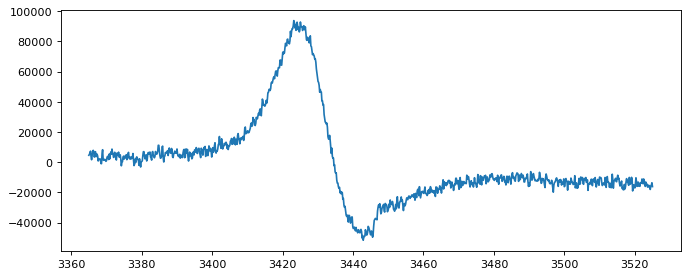

In [8]:
### Basic data import : .spc, 1D case
spc1 = '\\Tests\\home_test\\20190930_TC_20190826_NOSLY173F_1e_t=0s_T60K.par'
full_filename3 = currentpath + spc1
data3, abscissa3, par3 = eprload_BrukerESP.eprload_BrukerESP(full_filename3)
### plot the imported data
plt.plot(abscissa3, data3);

In [9]:
par3

{'HSW': 160.0,
 'DOS': 'Format',
 'ANZ': 1024,
 'MIN': -51706.242188,
 'MAX': 93789.757813,
 'JSS': 0,
 'GST': 3365.0,
 'GSI': 160.0,
 'JUN': 'G',
 'JON': 'Bruker BioSpin GmbH',
 'JCO': '26/08/2019 NosL Y173F 1e- +W  T=60K t=0s 23 dB',
 'JDA': '30/Sep/2019',
 'JTM': '12:59',
 'JRE': 'c:\\program files\\bruker emx\\syscal\\dualmode.cal',
 'JEX': 'field-sweep',
 'JNS': 200,
 'JSD': 107,
 'HCF': 3445.0,
 'RCT': 40.96,
 'RTC': 40.96,
 'RRG': 200000.0,
 'RMA': 3.5,
 'MF': 9.654603,
 'MP': 1.003,
 'MPD': 23.0,
 'JEY': ''}

___
### 2) Baseline Correction of 1D data files
___

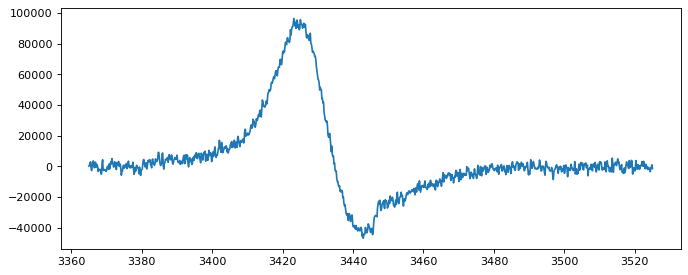

In [10]:
data3_new,c,error_parameters,cov = basecorr1D.basecorr1D(abscissa3, data3, polyorder=1, window = 50)
### plot the corrected data
plt.plot(abscissa3, data3_new);

In [11]:
print(c,error_parameters)

[ 4.07076853e+05 -1.19655790e+02] [1.58964390e+03 4.61393546e-01]


___
### 3) Datasmooth EPR data
___

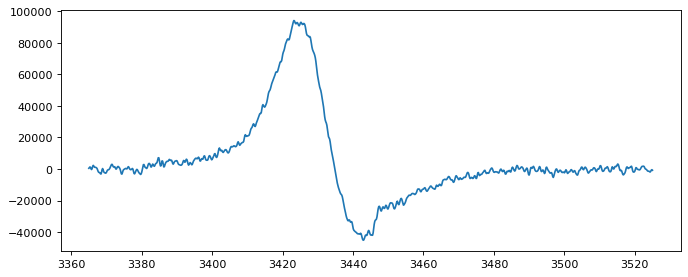

In [12]:
data3_smoothed = datasmooth.datasmooth(y=data3_new,window_length=3,method='binom')
### plot the corrected data
plt.plot(abscissa3, data3_smoothed);

___
### 4) Import multiple 1D datafiles for data treatment automation 
#### (3 steps : Import, Baseline correction, Smoothing)
___

In [13]:
folder = currentpath + '\\Tests\\home_test\\'
ListOfFiles = ImportMultipleFiles.ImportMultipleNameFiles(folder, Extension='.DSC')
maxlen = ImportMultipleFiles.MaxLengthOfFiles(ListOfFiles)
fulldata = ImportMultipleFiles.OpenMultipleFiles(ListOfFiles,Scaling=None,polyorder=1, window=20)

In [14]:
ListOfFiles

['C:\\Users\\Tim\\Jupyter\\CoreProject_EPRSuite\\Tests\\home_test\\20200305_NOSLwT_EDNMR_1.DSC',
 'C:\\Users\\Tim\\Jupyter\\CoreProject_EPRSuite\\Tests\\home_test\\20200311_NOSLwt_FSE_SRT_200us_100Shot_2.DSC',
 'C:\\Users\\Tim\\Jupyter\\CoreProject_EPRSuite\\Tests\\home_test\\20200311_NOSLwt_FSE_SRT_200us_100Shot_2_FirtsDeriv.DSC']

In [15]:
maxlen

1024

In [16]:
fulldata[1023,:]

array([            nan,             nan,             nan,             nan,
        1.21500000e+04, -2.15006362e+05, -1.37209293e+05, -1.21084011e-02,
        1.21500000e+04,  1.02126240e+04, -1.16755856e+04, -3.02724203e-02])

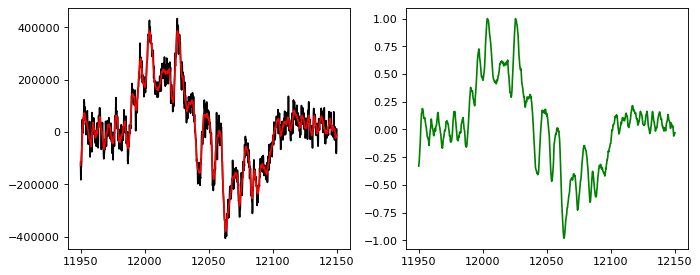

In [17]:
plt.subplot(1,2,1);
plt.plot(fulldata[:,8],fulldata[:,9].real,'k',fulldata[:,8],fulldata[:,10].real,'r');
plt.subplot(1,2,2);
plt.plot(fulldata[:,8],fulldata[:,11].real,'g');

___
### 5) Pseudo-derivation of zero derivatives ESR data (Q-Band Pulse-Field swept echo)
___

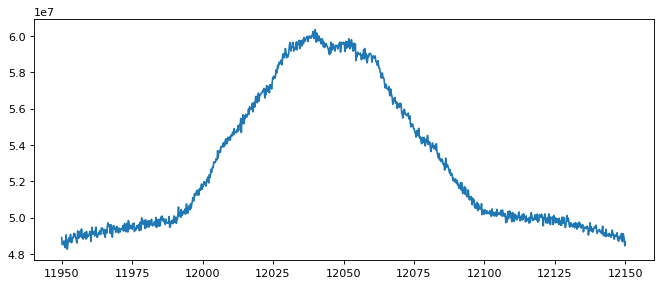

In [18]:
DSC4 = '\\Tests\\home_test\\20200311_NOSLwt_FSE_SRT_200us_100Shot_2.DSC'
full_filename4 = currentpath + DSC4
data4, abscissa4, par4 = eprload_BrukerBES3T.eprload_BrukerBES3T(full_filename4)
plt.plot(abscissa4,data4.real);

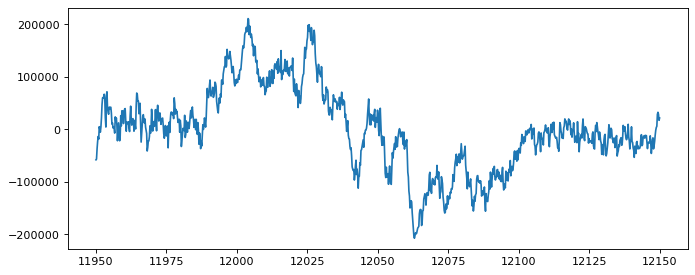

In [19]:
data4_basecorr,_,_,_ =  basecorr1D.basecorr1D(abscissa4, data4.real, polyorder=1, window = 50)
data4_new = fieldmodulation.fieldmodulation(x=abscissa4[:,0],y=data4_basecorr[:,],ModAmpl = 4,Harmonic=1)
plt.plot(abscissa4,data4_new);

___
### 6) Import of EPR pulsed data with automatic first order phase correction
___

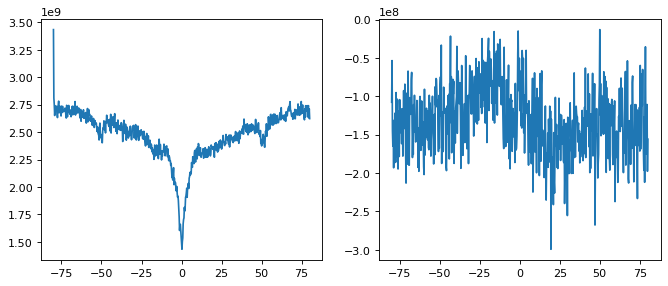

In [20]:
### Data import : .DSC, 1D case, EDNMR data
DSC5 = '\\Tests\\home_test\\20200305_NOSLwT_EDNMR_1.DSC'
full_filename5 = currentpath + DSC5
data5, abscissa5, par5 = eprload_BrukerBES3T.eprload_BrukerBES3T(full_filename5)
### plot the imported data
plt.subplot(1,2,1)
plt.plot(abscissa5, data5.real);
plt.subplot(1,2,2)
plt.plot(abscissa5, data5.imag);

In [21]:
data5_new, phase_parameters5 = automatic_phase.automatic_phase(data5,pivot1=data5.shape[0]/2,funcmodel='minfunc')

Optimization terminated successfully.
         Current function value: 1200554618135969792.000000
         Iterations: 102
         Function evaluations: 194


In [22]:
phase_parameters5

{'zero_phase': -2.840913142806693,
 'first_phase': (335.1673202667677, -35.19138265737876)}

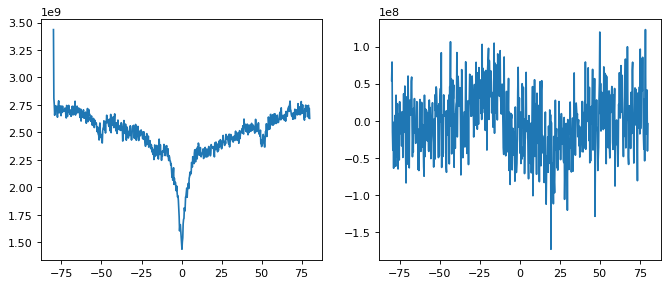

In [23]:
### plot the phase corrected data
plt.subplot(1,2,1)
plt.plot(abscissa5, data5_new.real);
plt.subplot(1,2,2)
plt.plot(abscissa5, data5_new.imag);

In [24]:
data5_new2, phase_parameters5b = automatic_phase.automatic_phase(data5,pivot1=1,funcmodel='acme')

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 97
         Function evaluations: 183


In [25]:
phase_parameters5b

{'zero_phase': -2.840913142806693,
 'first_phase': (278.85574953401283, -58.18504262392516)}

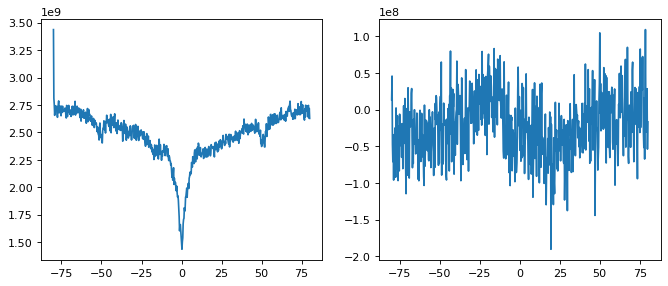

In [26]:
### plot the phase corrected data
plt.subplot(1,2,1)
plt.plot(abscissa5, data5_new2.real);
plt.subplot(1,2,2)
plt.plot(abscissa5, data5_new2.imag);

___
### 7) Frequency domain transformation of ESEEM data
___

Optimization terminated successfully.
         Current function value: 13080147097.246954
         Iterations: 109
         Function evaluations: 206


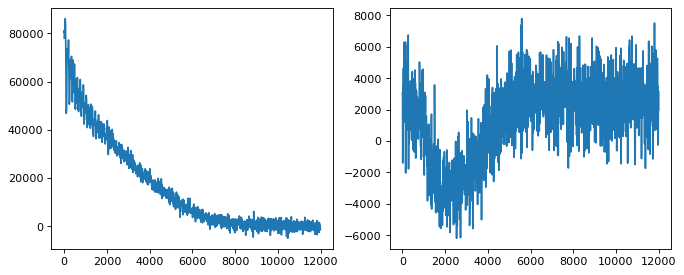

In [27]:
DSC6 = '//DSC_DTA_files//2010_06_25_IKKG_C95_2pESEEM.DSC'
full_filename6 = folderdata + DSC6
data6, abscissa6, par6 = eprload_BrukerBES3T.eprload_BrukerBES3T(full_filename6)
### plot the imported data
data6_new, phase_parameters6 = automatic_phase.automatic_phase(data6,pivot1=data6.shape[0]/2,funcmodel='minfunc')
plt.subplot(1,2,1)
plt.plot(abscissa6, data6_new.real);
plt.subplot(1,2,2)
plt.plot(abscissa6, data6_new.imag);


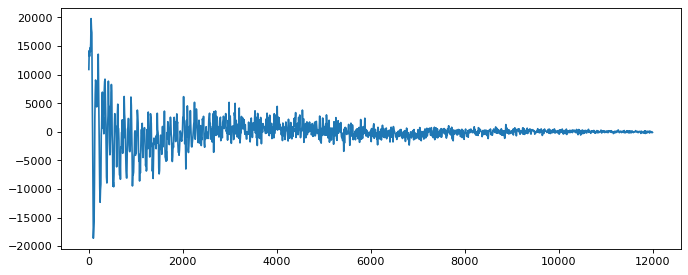

In [28]:
win = windowing.windowing(window_type='ham+',M=abscissa6.shape[0])
data6_basecorr,_,_,_ = basecorr1D.basecorr1D(abscissa6,data6_new.real,polyorder=3,window=750)
data6_win = win*np.ravel(data6_basecorr)
plt.plot(abscissa6,data6_win);

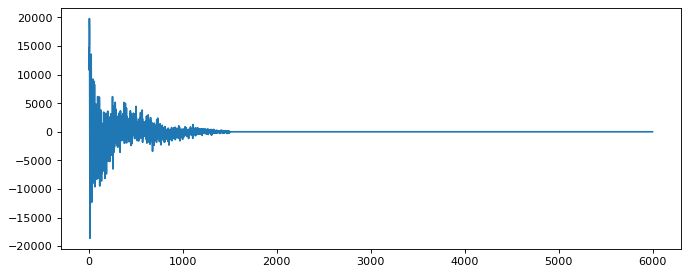

In [29]:
### zero_filling
npts = data6_win.shape[0]
data6_win_zero = np.ones(npts*4)
data6_win_zero[0:npts] = data6_win[0:npts]
plt.plot(data6_win_zero);

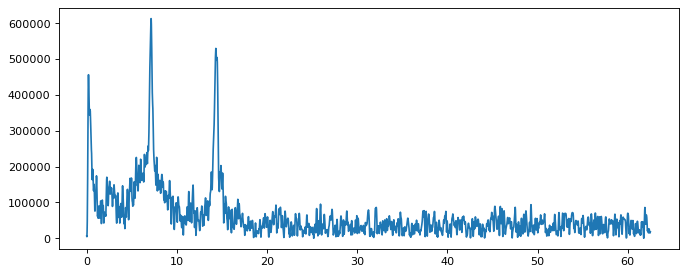

In [34]:
### frequency domain transformation
new_timeaxis6 = np.linspace(abscissa6[0],abscissa6[-1]*4,npts*4)
fdaxis6 = fdaxis.fdaxis(TimeAxis = new_timeaxis6)
data6_fft = np.fft.fftshift(np.fft.fft(data6_win_zero))
fft_npts = int(np.fix(data6_fft.shape[0]/2))
plt.plot(fdaxis6[fft_npts:]*1000,np.abs(data6_fft[fft_npts:]));

### Lexical List of the functions in the Scripts folder :
##### In alphabetic order :
    
<p><strong>1) automatic_phase</strong></p>
    <p>'automatic_phase' --> main function to do phase correction using two algorithms (see Binczyk et al. BioMedical Engineering OnLine 2015, 14(Suppl 2):S5 doi: 10.1186/1475-925X-14-S2-S5) : </p>
        <ol><p>'acme' (see Chen Li et al. Journal of Magnetic Resonance 158 (2002) 164-168)</p>
            <p>'minfunc' (minimization of the imaginary part)</p>
        </ol>
<p><strong>2) basecorr1D</strong></p>
    <ol><p>'basecorr1D'</p>
        <p>'error_vandermonde'</p>
    </ol>
<p><strong>3) datasmooth</strong></p>
    <ol><p>'datasmooth'</ol> 
<p><strong>4) eprload_BrukerBES3T</strong></p>
    <ol><p>'eprload_BrukerBES3T'</p>
        <p>'xepr_load_acqu'</p>
    </ol> 
<p><strong>5) eprload_BrukerESP</strong></p>
    <ol><p>'eprload_BrukerESP'</p>
        <p>'load_winepr_param'</p>
    </ol>  
<p><strong>6) fdaxis</strong></p>
    <ol><p>'fdaxis'</ol>    
<p><strong>7) fieldmodulation</strong></p>
    <ol><p>'fieldmodulation'</ol>
<p><strong>8) hilberttrans</strong></p>
    <ol><p>'hilberttrans'</ol>  
<p><strong>9) ImportMultipleFiles</strong></p>
    <ol><p>'ImportMultipleNameFiles'</p>
        <p>'MaxLengthOfFiles'</p>
        <p>'OpenMultipleFiles'</p>
        <p>'eprload'</p>
     </ol>    
<p><strong>10) rcfilt</strong></p>
    <ol><p>'rcfilt'</ol>  
<p><strong>11) statistic_tools</strong></p>
    <ol><p>'ComputeJacobian'</p>
        <p>'ComputeSER'</p>
        <p>'corr_to_covariancematrix'</p>
        <p>'cov_to_correlationmatrix'</p>
        <p>'csc_matrix'</p>
        <p>'error_jacobian'</p>
        <p>'error_vandermonde</p>
        <p>'residual</p>
        <p>'stddev_covnmatrix</p>
    </ol>    
<p><strong>12) windowing</strong></p>
    <ol><p>'windowing'</p></ol>